In [143]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

## Question 1

### Section 1

In [144]:
mean_waiting_time = 5
lambda_rate = 1 / mean_waiting_time
number_samples = 100
waiting_times = []

start = time.time()
# generating samples
for _ in range(number_samples):
    u = np.random.uniform(0, 1)
    waiting_time = -np.log(1 - u) / lambda_rate # -5 ln(1-u)
    waiting_times.append(waiting_time)

end = time.time()
print(round(end-start, 3), " seconds")

0.003  seconds


Text(0.5, 1.0, 'Sampled distribution of waiting times')

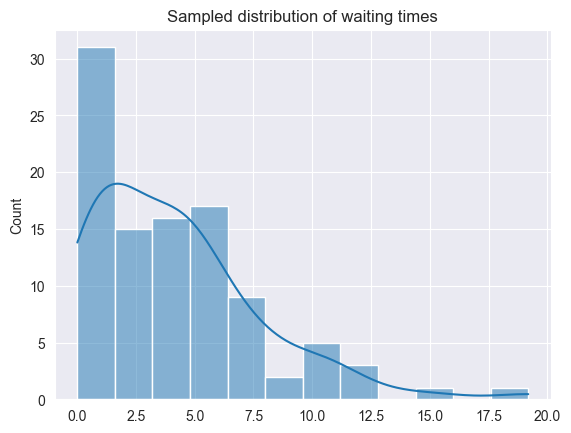

In [145]:
sns.histplot(np.array(waiting_times), kde=True)
plt.title("Sampled distribution of waiting times")

Text(0.5, 1.0, 'Sampled distribution of waiting times')

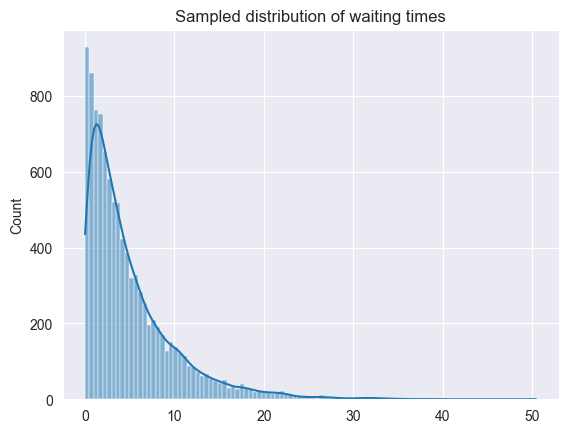

In [146]:
x = np.random.exponential(1/lambda_rate, size=10000)
sns.histplot(x, kde=True)
plt.title("Sampled distribution of waiting times")


### section 2

In [147]:
mean_waiting_time = 5
lambda_rate = 1 / mean_waiting_time
a, b = 0, 10
c = 2
number_samples = 1000000
samples = []

start = time.time()

while len(samples) < number_samples:
    # Step 1: Generate a sample from the proposal distribution
    x = np.random.uniform(a, b)
    
    # Step 2: Compute the target and scaled proposal densities at x
    f_x = lambda_rate * np.exp(-lambda_rate * x)
    g_x = 1 / (b - a)
    
    # Step 3: Accept or reject the sample
    acceptance_probability = f_x / (c * g_x)
    u = np.random.uniform(0, 1)
    if u <= acceptance_probability:
        samples.append(x)
        

end = time.time()

samples = np.array(samples)

print(round(end-start, 3), " seconds")

14.293  seconds


<Axes: ylabel='Count'>

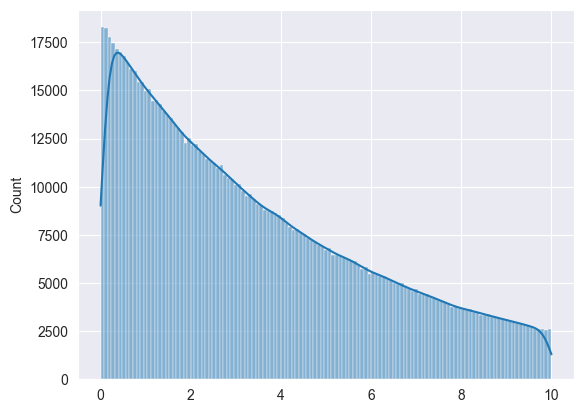

In [148]:
sns.histplot(samples, kde=True)


### section 3

In [149]:
import numpy as np
import time

def generate_exponential_samples(mean_waiting_time, number_samples):

    lambda_rate = 1 / mean_waiting_time
    samples = []

    start = time.time()
    # Generating samples using the inverse transform method
    for _ in range(number_samples):
        u = np.random.uniform(0, 1)
        waiting_time = -np.log(1 - u) / lambda_rate  # -mean_waiting_time * ln(1-u)
        samples.append(waiting_time)
    end = time.time()

    execution_time = round(end - start, 3)  # Time in seconds
    return execution_time, samples

# Example usage:
mean_waiting_time = 5  # Mean waiting time of 5 minutes
number_samples = np.arange(100, 100001, 100)   # Number of samples to generate

times = []
for _ in range(1000):
    time_, samples = generate_exponential_samples(mean_waiting_time, 100)
    times.append(time_)

In [150]:
print(len(times))
print(times)

1000
[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.006, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.002, 0.001, 0.0, 0.001, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.013, 0.0, 0.001, 0.001, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.011, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.001, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.004, 0.0, 0.0, 0.001, 0.0, 0.0, 0.001, 0

<Axes: ylabel='Count'>

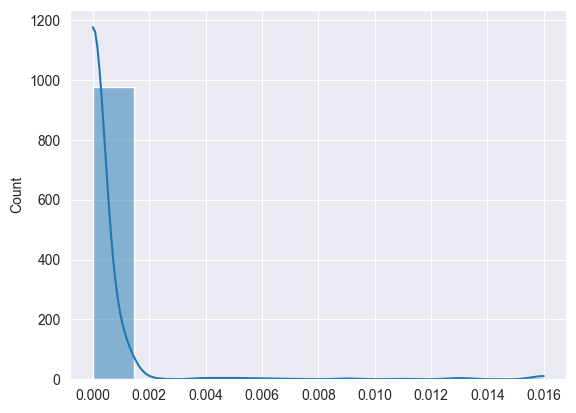

In [151]:
sns.histplot(times, kde=True)

In [152]:
import pandas as pd

series = pd.Series(times)
series.describe()

count    1000.000000
mean        0.000336
std         0.001752
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         0.016000
dtype: float64

In [153]:
import numpy as np
import time

def generate_samples_rejection(mean_waiting_time, a, b, c, number_samples):

    lambda_rate = 1 / mean_waiting_time
    samples = []
    start = time.time()

    while len(samples) < number_samples:
        # Step 1: Generate a sample from the proposal distribution
        x = np.random.uniform(a, b)
        
        # Step 2: Compute the target and scaled proposal densities at x
        f_x = lambda_rate * np.exp(-lambda_rate * x)  # Target density
        g_x = 1 / (b - a)                            # Proposal density
        
        # Step 3: Accept or reject the sample
        acceptance_probability = f_x / (c * g_x)
        u = np.random.uniform(0, 1)
        if u <= acceptance_probability:
            samples.append(x)

    end = time.time()
    execution_time = round(end - start, 3)
    return execution_time, np.array(samples)

# Example usage:
mean_waiting_time = 5
a, b = 0, 10
c = 2
number_samples = np.arange(100, 100001, 200) 
times = []
for _ in range(1000):
    time_, samples = generate_samples_rejection(mean_waiting_time, a, b, c, 1000)
    times.append(time_)

In [154]:
import pandas as pd

series = pd.Series(times)
series.describe()

count    1000.000000
mean        0.012923
std         0.007263
min         0.000000
25%         0.006000
50%         0.017000
75%         0.017000
max         0.025000
dtype: float64

In [155]:
import scipy as sp

sp.stats.norm.cdf(x=0.847, loc=0, scale=1)

0.8015024392756755

In [156]:
sp.stats.norm.cdf(x=-0.847, loc=0, scale=1)


0.19849756072432445

In [157]:
sp.stats.norm.cdf(x=0.847, loc=0, scale=1) - sp.stats.norm.cdf(x=-0.847, loc=0, scale=1)


0.6030048785513511

# Question 2


In [158]:
import numpy as np
import scipy as sp

## Section 1

In [159]:
X = np.array([800, 820, 760, 850, 900, 810, 780, 790, 830, 840, 870, 830, 820, 850, 880, 810, 840, 830, 820, 870])

print(X.mean())
print(X.std())

830.0
33.61547262794322


## Section 2

$$\mu\in\overline{X}\pm t_{\frac{\alpha}{2},n-1}\frac{S}{\sqrt{n}}$$

In [160]:
alpha = 0.05
std = 33.62
X_tel = 830.0
n = 20
t_n_1 = -sp.stats.t.ppf(0.025, n-1)
print(t_n_1)

print(f"[{X_tel - t_n_1 * (std / np.sqrt(n))}, {X_tel + t_n_1 * (std / np.sqrt(n))}]")

2.0930240544082634
[814.2653556561627, 845.7346443438373]


## Question 3

In [161]:
import pandas as pd
import numpy as np

In [162]:
data_3 = pd.read_csv("hw_1_Q3_data (2).csv")
data_3.head()

,predicted_person_name,correct_person_name
0,John,John
1,Emily,Emily
2,Michael,John
3,Emma,Emma
4,David,John


In [163]:
data_3.shape

(330, 2)

In [164]:
data_3['predicted'] = data_3['predicted_person_name'] == data_3['correct_person_name']

In [165]:
def convert_to_int(value):
    return 1 if value == True else 0

data_3['predicted'] = data_3['predicted'].apply(convert_to_int)
data_3


,predicted_person_name,correct_person_name,predicted
0,John,John,1
1,Emily,Emily,1
2,Michael,John,0
3,Emma,Emma,1
4,David,John,0
...,...,...,...
325,Michael,Michael,1
326,Ava,Ava,1
327,Emily,Emily,1
328,Matthew,Matthew,1


In [166]:
print(f"Our dataset contain {data_3.shape[0]} observations")

Our dataset contain 330 observations


In [167]:
p_hat = np.mean(data_3['predicted'])
print(f"Estimated p= {p_hat}")

Estimated p= 0.9787878787878788


In [168]:
SE = np.sqrt((p_hat * (1-p_hat)) / 1000)
SE

0.004556552109413818

In [169]:
alpha = 0.05
std = 33.62
X_tel = 830.0
n = 20

In [170]:
print("Null hypothesis mean ($\mu_0$)")

Null hypothesis mean ($\mu_0$)


In [171]:
from IPython.display import display, Latex
display(Latex(f"Null hypothesis mean ($\mu_0$)"))

<IPython.core.display.Latex object>

In [172]:
sp.stats.chi2.ppf(1 - 0.05, df=1)

3.841458820694124

In [173]:
p_hat = 0.987  # estimated proportion
n = data_3.shape[0]  

# Z-value for 95% confidence
z = 1.96

se = np.sqrt(p_hat * (1 - p_hat) / n)

lower_bound = p_hat - z * se
upper_bound = p_hat + z * se

print(f"The 95% confidence interval for the proportion is approximately ({lower_bound:.3f}, {upper_bound:.3f})")


The 95% confidence interval for the proportion is approximately (0.975, 0.999)


In [174]:
names = set(data_3['correct_person_name'])
name_to_idx = {name:idx for idx, name in enumerate(names)}
print(name_to_idx)

{'Sophia': 0, 'Olivia': 1, 'David': 2, 'Daniel': 3, 'Michael': 4, 'John': 5, 'Emily': 6, 'Ava': 7, 'Emma': 8, 'Matthew': 9}


### Section 3

In [175]:
names

{'Ava',
 'Daniel',
 'David',
 'Emily',
 'Emma',
 'John',
 'Matthew',
 'Michael',
 'Olivia',
 'Sophia'}

In [176]:
data_3

,predicted_person_name,correct_person_name,predicted
0,John,John,1
1,Emily,Emily,1
2,Michael,John,0
3,Emma,Emma,1
4,David,John,0
...,...,...,...
325,Michael,Michael,1
326,Ava,Ava,1
327,Emily,Emily,1
328,Matthew,Matthew,1


#### Creating the confusion matrix

In [177]:
labels = list(set(data_3['correct_person_name']).union(set(data_3['predicted_person_name'])))

def create_confusion_matrix(true, pred, labels):
    matrix = pd.DataFrame(0, index=labels, columns=labels)
    for t,p in zip(true, pred):
        matrix.loc[t, p] += 1
    
    return matrix

confusion_matrix = create_confusion_matrix(data_3['correct_person_name'], data_3['predicted_person_name'], labels)

confusion_matrix

,Olivia,David,Daniel,Michael,John,Emma,Matthew,Sophia,Emily,Ava
Olivia,33,0,0,0,0,0,0,1,0,0
David,0,32,0,1,0,0,0,0,0,0
Daniel,0,0,32,0,0,0,0,0,0,0
Michael,0,0,0,31,0,0,0,0,0,0
John,0,1,1,1,33,0,0,0,0,0
Emma,0,0,0,0,0,33,0,0,0,1
Matthew,0,0,0,0,0,0,33,0,0,0
Sophia,0,0,0,0,0,0,0,31,0,0
Emily,0,0,0,0,0,0,0,0,33,0
Ava,0,0,0,0,0,0,0,1,0,32


#### Function to calculate precision, recall, and F1 score


In [178]:
def calculate_metrics(matrix):
    metrics = {}
    for label in matrix.columns:
        tp = matrix.loc[label, label]
        fp = matrix[label].sum() - tp
        fn = matrix.loc[label].sum() - tp
        tn = matrix.sum().sum() - (tp + fp + fn)  # Approximation for TN
        precision = tp / (tp + fp) if (tp + fp) != 0 else 0
        recall = tp / (tp + fn) if (tp + fn) != 0 else 0
        f1 = 2 * (precision * recall) / (precision + recall) if (precision + recall) != 0 else 0
        fpr = fp / (fp + tn) if (fp + tn) != 0 else 0
        fnr = fn / (tp + fn) if (tp + fn) != 0 else 0
        metrics[label] = {
            'Precision': precision, 
            'Recall': recall, 
            'F1 Score': f1,
            'TP': tp, 
            'FP': fp, 
            'FN': fn,
            'TN': tn,  
            'FPR': fpr, 
            'FNR': fnr
        }
    return metrics

# Create confusion matrix and calculate metrics

metrics = calculate_metrics(confusion_matrix)

# Print the metrics including TP, FP, FN
for label, metric in metrics.items():
    print(f"Class: {label}, TP: {metric['TP']}, FP: {metric['FP']}, FN: {metric['FN']}, TN: {metric['TN']}, Precision: {metric['Precision']:.2f}, Recall: {metric['Recall']:.2f}, F1 Score: {metric['F1 Score']:.2f}, FPR: {metric['FPR']:.3f}, FNR: {metric['FNR']:.3f}")


Class: Olivia, TP: 33, FP: 0, FN: 1, TN: 296, Precision: 1.00, Recall: 0.97, F1 Score: 0.99, FPR: 0.000, FNR: 0.029
Class: David, TP: 32, FP: 1, FN: 1, TN: 296, Precision: 0.97, Recall: 0.97, F1 Score: 0.97, FPR: 0.003, FNR: 0.030
Class: Daniel, TP: 32, FP: 1, FN: 0, TN: 297, Precision: 0.97, Recall: 1.00, F1 Score: 0.98, FPR: 0.003, FNR: 0.000
Class: Michael, TP: 31, FP: 2, FN: 0, TN: 297, Precision: 0.94, Recall: 1.00, F1 Score: 0.97, FPR: 0.007, FNR: 0.000
Class: John, TP: 33, FP: 0, FN: 3, TN: 294, Precision: 1.00, Recall: 0.92, F1 Score: 0.96, FPR: 0.000, FNR: 0.083
Class: Emma, TP: 33, FP: 0, FN: 1, TN: 296, Precision: 1.00, Recall: 0.97, F1 Score: 0.99, FPR: 0.000, FNR: 0.029
Class: Matthew, TP: 33, FP: 0, FN: 0, TN: 297, Precision: 1.00, Recall: 1.00, F1 Score: 1.00, FPR: 0.000, FNR: 0.000
Class: Sophia, TP: 31, FP: 2, FN: 0, TN: 297, Precision: 0.94, Recall: 1.00, F1 Score: 0.97, FPR: 0.007, FNR: 0.000
Class: Emily, TP: 33, FP: 0, FN: 0, TN: 297, Precision: 1.00, Recall: 1.00,

In [179]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Olivia,David,Daniel,Michael,John,Emma,Matthew,Sophia,Emily,Ava
Precision,1.000000,0.969697,0.969697,0.939394,1.000000,1.000000,1.0,0.939394,1.0,0.969697
Recall,0.970588,0.969697,1.000000,1.000000,0.916667,0.970588,1.0,1.000000,1.0,0.969697
F1 Score,0.985075,0.969697,0.984615,0.968750,0.956522,0.985075,1.0,0.968750,1.0,0.969697
TP,33.000000,32.000000,32.000000,31.000000,33.000000,33.000000,33.0,31.000000,33.0,32.000000
FP,0.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.0,2.000000,0.0,1.000000
FN,1.000000,1.000000,0.000000,0.000000,3.000000,1.000000,0.0,0.000000,0.0,1.000000
TN,296.000000,296.000000,297.000000,297.000000,294.000000,296.000000,297.0,297.000000,297.0,296.000000
FPR,0.000000,0.003367,0.003356,0.006689,0.000000,0.000000,0.0,0.006689,0.0,0.003367
FNR,0.029412,0.030303,0.000000,0.000000,0.083333,0.029412,0.0,0.000000,0.0,0.030303


In [180]:
averaged_FPR = metrics_df.iloc[7, :].mean()
averaged_FPR

0.0023467637853397992

In [181]:
averaged_FNR = metrics_df.iloc[8, :].mean()
averaged_FNR

0.020276292335115863

### Section 4

In [189]:
def calculate_metrics_overall(metrics):
    total_TP = total_FP = total_FN = 0
    
    for metric in metrics.values():
        total_TP += metric['TP']
        total_FP += metric['FP']
        total_FN += metric['FN']
    
    micro_precision = total_TP / (total_TP + total_FP)
    micro_recall = total_TP / (total_TP + total_FN)
    micro_f1 = 2 * (micro_precision * micro_recall) / (micro_precision + micro_recall)
    
    macro_precision = sum(metric['Precision'] for metric in metrics.values()) / len(metrics)
    macro_recall = sum(metric['Recall'] for metric in metrics.values()) / len(metrics)
    macro_f1 = sum(metric['F1 Score'] for metric in metrics.values()) / len(metrics)
    
    # print(f"Macro-average Precision: {macro_precision:.3f}")
    # print(f"Macro-average Recall: {macro_recall:.3f}")
    # print(f"Macro-average F1 Score: {macro_f1:.3f}")
    
    return macro_f1, macro_precision, macro_recall

F1, pre, rec = calculate_metrics_overall(metrics)


In [199]:
class BCA:
    def __init__(self, data, orginal_F1, alpha, calculate_metrics, calculate_metrics_overall, create_confusion_matrix, labels):
        self.data = data
        self.orginal_F1 = orginal_F1
        self.alpha = alpha
        self.n = len(self.data)
        self.calculate_metrics = calculate_metrics
        self.calculate_metrics_overall = calculate_metrics_overall
        self.create_confusion_matrix = create_confusion_matrix
        self.labels = labels
    
    def _generate_bootstrap_samples_f1(self):
        indices = np.random.randint(0, self.n, self.n) 
        samples = self.data.iloc[indices]
        conf_matrix = self.create_confusion_matrix(samples['predicted_person_name'], samples['correct_person_name'], self.labels)
        # display(conf_matrix)
        calculated_matrices = self.calculate_metrics(conf_matrix)
        F1_score = self.calculate_metrics_overall(calculated_matrices)[0]
        return F1_score
    
    def _jackknife(self):
        jack_f1s = []
        
        for i in range(self.n):
            jack_indices = np.delete(np.arange(n), i)
            samples = self.data.iloc[jack_indices]
            conf_matrix = self.create_confusion_matrix(samples['predicted_person_name'], samples['correct_person_name'], self.labels)
            calculated_matrices = self.calculate_metrics(conf_matrix)
            F1_score = self.calculate_metrics_overall(calculated_matrices)[0]
            jack_f1s.append(F1_score)
        acc = np.sum((np.mean(jack_f1s) - jack_f1s)**3) / (6 * (np.sum((np.mean(jack_f1s) - jack_f1s)**2)**1.5))
        return acc
        
    def bca_run(self, n_bootstrap=2000):
        boot_f1s = []
        
        for _ in range(n_bootstrap):
            F1 = self._generate_bootstrap_samples_f1()
            boot_f1s.append(F1)
        
        z0 = sp.stats.norm.ppf((np.sum(boot_f1s) < self.orginal_F1) + 0.5) / (n_bootstrap + 1)
        
        jackknide_acc = self._jackknife()
        
        z_alpha = sp.stats.norm.ppf(self.alpha / 2)
        z_1_alpha = sp.stats.norm.ppf(1 - self.alpha / 2)
        lo_perc = 100 * sp.stats.norm.cdf(2 * z0 + z_alpha * (1 - jackknide_acc * z0) / (1 - jackknide_acc * z_alpha))
        hi_perc = 100 * sp.stats.norm.cdf(2 * z0 + z_1_alpha * (1 - jackknide_acc * z0) / (1 - jackknide_acc * z_1_alpha))

        conf_int = np.percentile(boot_f1s, [lo_perc, hi_perc])
        
        return conf_int
    
    
                
    

data_sec5 = data_3[['predicted_person_name', 'correct_person_name']]
bca = BCA(data_sec5, F1, 0.05, calculate_metrics, calculate_metrics_overall, create_confusion_matrix, labels)

bca.bca_run()

array([0.96015293, 0.99131968])

In [184]:
data_sec5 = data_3[['predicted_person_name', 'correct_person_name']]
data_sec5

,predicted_person_name,correct_person_name
0,John,John
1,Emily,Emily
2,Michael,John
3,Emma,Emma
4,David,John
...,...,...
325,Michael,Michael
326,Ava,Ava
327,Emily,Emily
328,Matthew,Matthew
